<a href="https://colab.research.google.com/github/deNzik3/data_analytics_projects/blob/main/sales_EDA%2Bvisualization%2BSQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

####Let's merge all csv files in one

In [ ]:
files = [file for file in os.listdir('/content/sales_project')]

sub = pd.DataFrame()

for file in files:
  df = pd.read_csv('/content/sales_project/'+file)
  sub = pd.concat([sub,df])


####Data cleaning

In [ ]:
sub = sub.sort_values(by = 'Order Date')

In [ ]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 6344 to 9664
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [ ]:
sub.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
sub.columns = sub.columns.str.lower()
sub.columns = sub.columns.str.replace(' ','_')

In [ ]:
sub_nan = sub[sub.isna().any(axis = 1)]
sub_nan

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
75,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN,NaN,NaN
1488,NaN,NaN,NaN,NaN,NaN,NaN
1517,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
8596,NaN,NaN,NaN,NaN,NaN,NaN
8623,NaN,NaN,NaN,NaN,NaN,NaN
9144,NaN,NaN,NaN,NaN,NaN,NaN
9631,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sub = sub.dropna(how = 'all', axis = 0)

In [ ]:
sub.tail()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
17085,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
18888,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
18648,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
19074,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
17012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
sub = sub[sub['order_date'] != 'Order Date']
sub.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
8507,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"


In [ ]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 6344 to 2117
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          185950 non-null  object
 1   product           185950 non-null  object
 2   quantity_ordered  185950 non-null  object
 3   price_each        185950 non-null  object
 4   order_date        185950 non-null  object
 5   purchase_address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


I'm going to convert some columns into integer type

In [ ]:
sub['order_id'] = sub['order_id'].astype('int64')

sub['quantity_ordered'] = sub['quantity_ordered'].astype('int32')
sub['price_each'] = sub['price_each'].astype('float64')




####Question №1: What was the most productive month in terms of sales?

In [ ]:
sub.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
8507,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001"
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"


In [ ]:
sub['total_sales'] = sub['quantity_ordered'] * sub['price_each']

Let's take the month out of the date

In [ ]:
sub['month'] = sub['order_date'].str[0:2].astype('int32')

In [ ]:
sub.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,total_sales,month
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",11.99,1
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",11.95,1
8507,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",150.00,1
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",2.99,1
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",23.90,1


In [ ]:
data = sub.groupby(by = 'month',as_index = False)['total_sales'].sum() \
          .sort_values(by = 'total_sales',ascending = False)
data

,month,total_sales
11,12,4613443.34
9,10,3736726.88
3,4,3390670.24
10,11,3199603.20
4,5,3152606.75
2,3,2807100.38
6,7,2647775.76
5,6,2577802.26
7,8,2244467.88
1,2,2202022.42


[Text(0, 0.5, 'sold in total')]

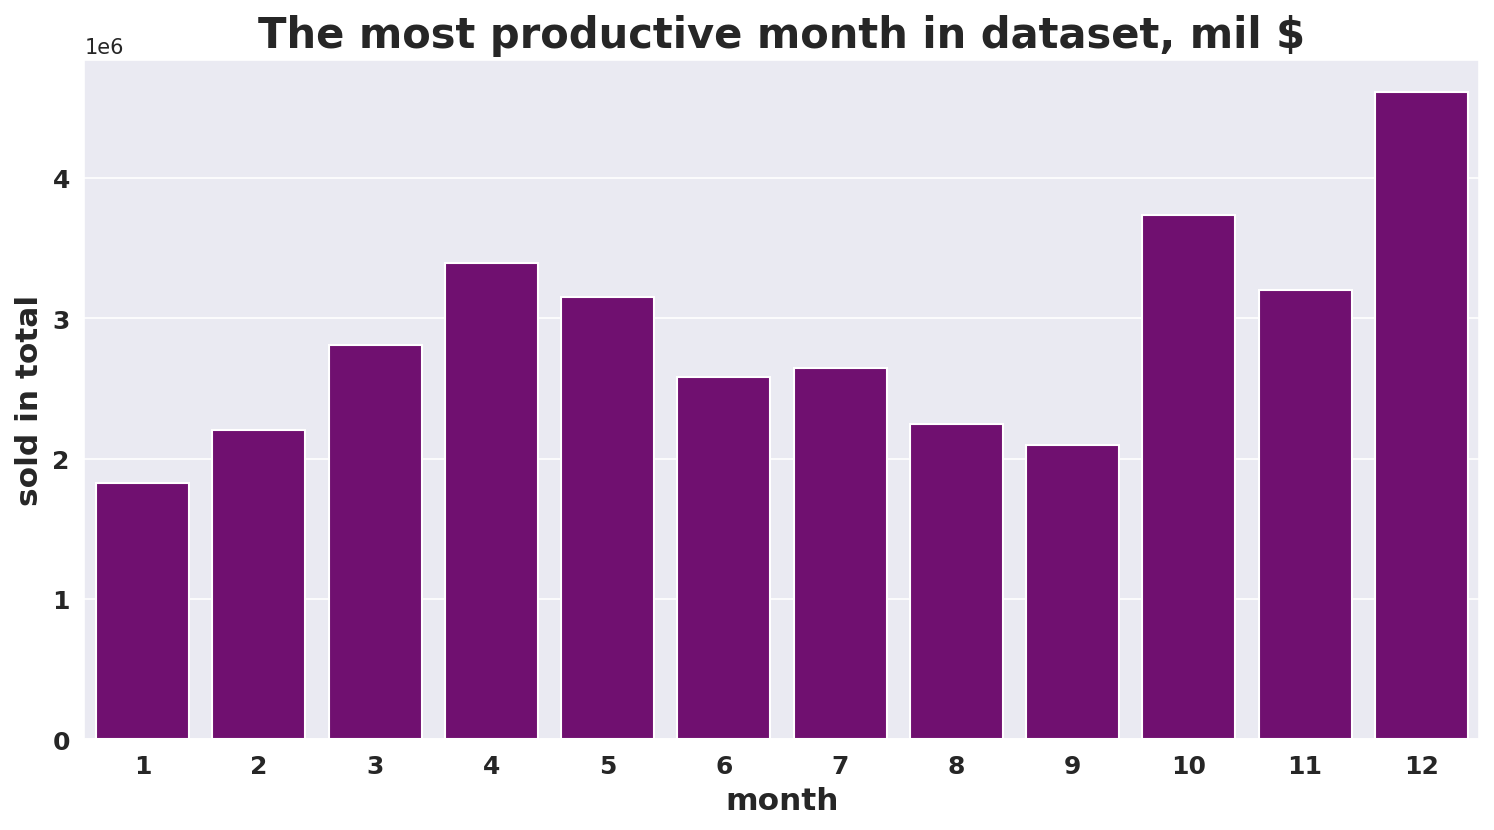

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,6))

plt.title('The most productive month in dataset, mil $',weight = 'heavy',size = 20)

plt.yticks(size = 12,weight = 'bold')
plt.xticks(size = 12,weight = 'bold')

plt.ylabel('',size = 15, weight = 'heavy')
plt.xlabel('',size = 15, weight = 'heavy')


sns.barplot(data = data, x = data['month'],y = data['total_sales'],color = 'purple') \
    .set(ylabel = 'sold in total')

####Question №2: What city had the highest number of sales?

In [ ]:
sub.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,total_sales,month
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",11.99,1
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",11.95,1
8507,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",150.00,1
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",2.99,1
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",23.90,1


Creating "city" column

In [ ]:
sub['city'] = sub['purchase_address'].apply(lambda x: x.split(',')[1])

In [ ]:
sub.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,total_sales,month,city
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",11.99,1,New York City
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",11.95,1,San Francisco
8507,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",150.00,1,New York City
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",2.99,1,Dallas
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",23.90,1,Atlanta


In [ ]:
data = sub.groupby(by = 'city', as_index = False )['total_sales'].sum() \
                                                          .sort_values(by = 'total_sales', ascending = False)
data.head()

,city,total_sales
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58


[Text(0, 0.5, 'sold in total')]

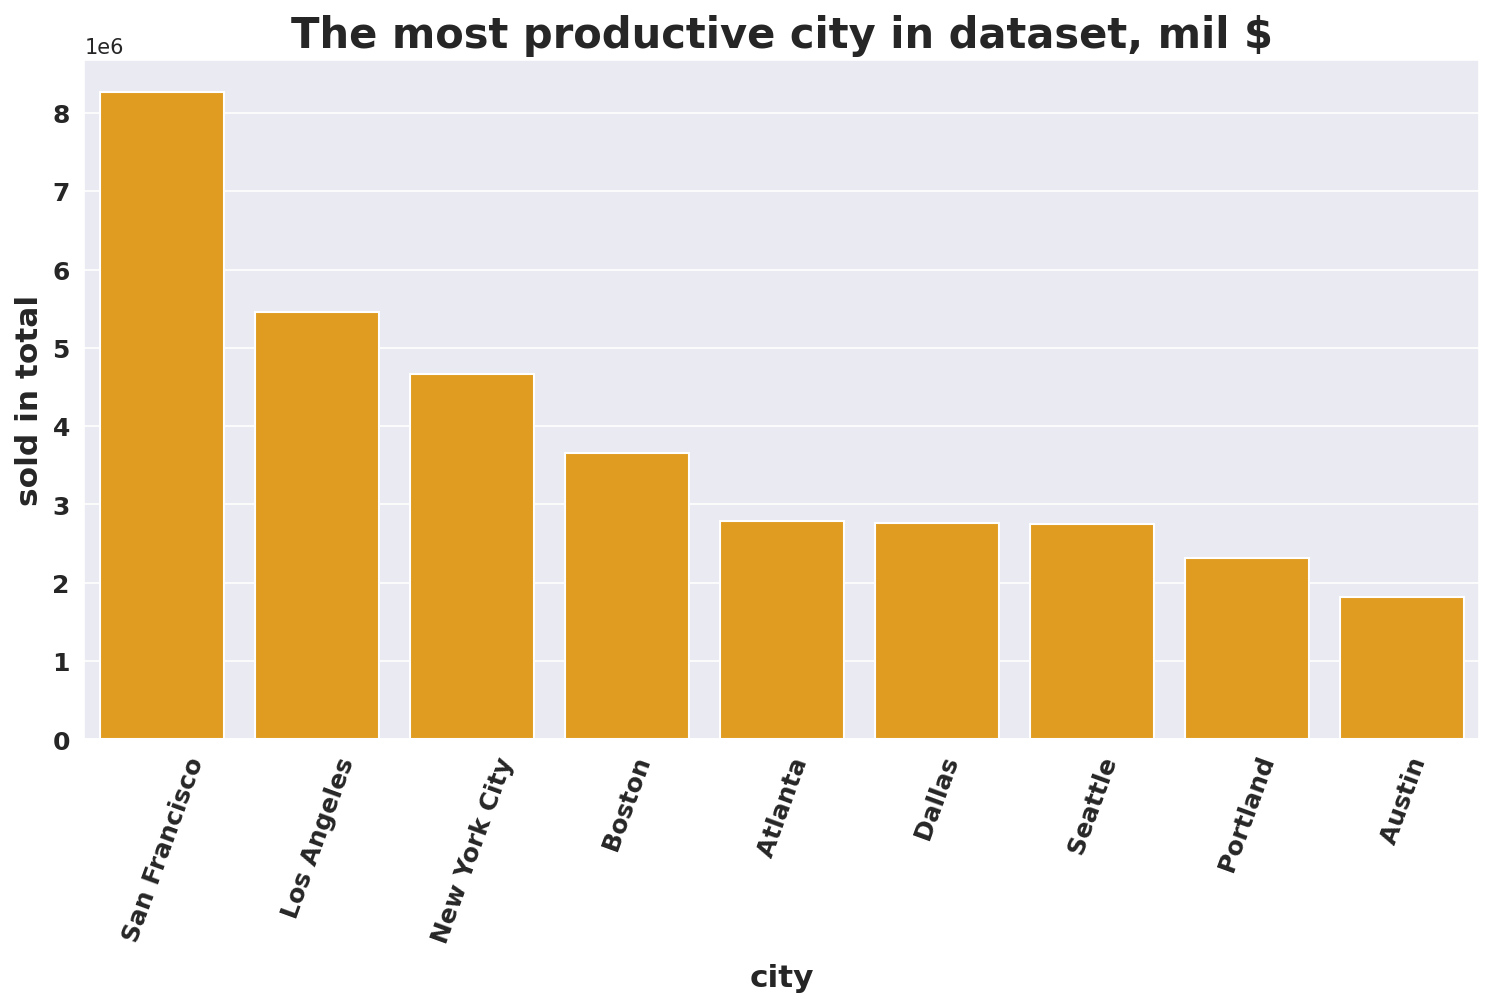

In [ ]:

plt.figure(figsize = (12,6))

plt.title('The most productive city in dataset, mil $',weight = 'heavy',size = 20)

plt.yticks(size = 12,weight = 'bold')
plt.xticks(size = 12,weight = 'bold',rotation = 70)

plt.ylabel('',size = 15, weight = 'heavy')
plt.xlabel('',size = 15, weight = 'heavy')


sns.barplot(data = data, x = data['city'],y = data['total_sales'],color = 'orange') \
    .set(ylabel = 'sold in total')

####Question №3: At what time did you most often buy the product?

In [ ]:
sub.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,total_sales,month,city
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",11.99,1,New York City
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",11.95,1,San Francisco
8507,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",150.00,1,New York City
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",2.99,1,Dallas
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",23.90,1,Atlanta


In [ ]:
sub['order_date'] = pd.to_datetime(sub['order_date'])

In [ ]:
sub['hour'] = sub['order_date'].dt.hour

In [ ]:
data = sub.groupby(by = 'hour', as_index = False)['order_id'].count()
data

,hour,order_id
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


<AxesSubplot:title={'center':'The most active hours'}, xlabel='hour', ylabel='order_id'>

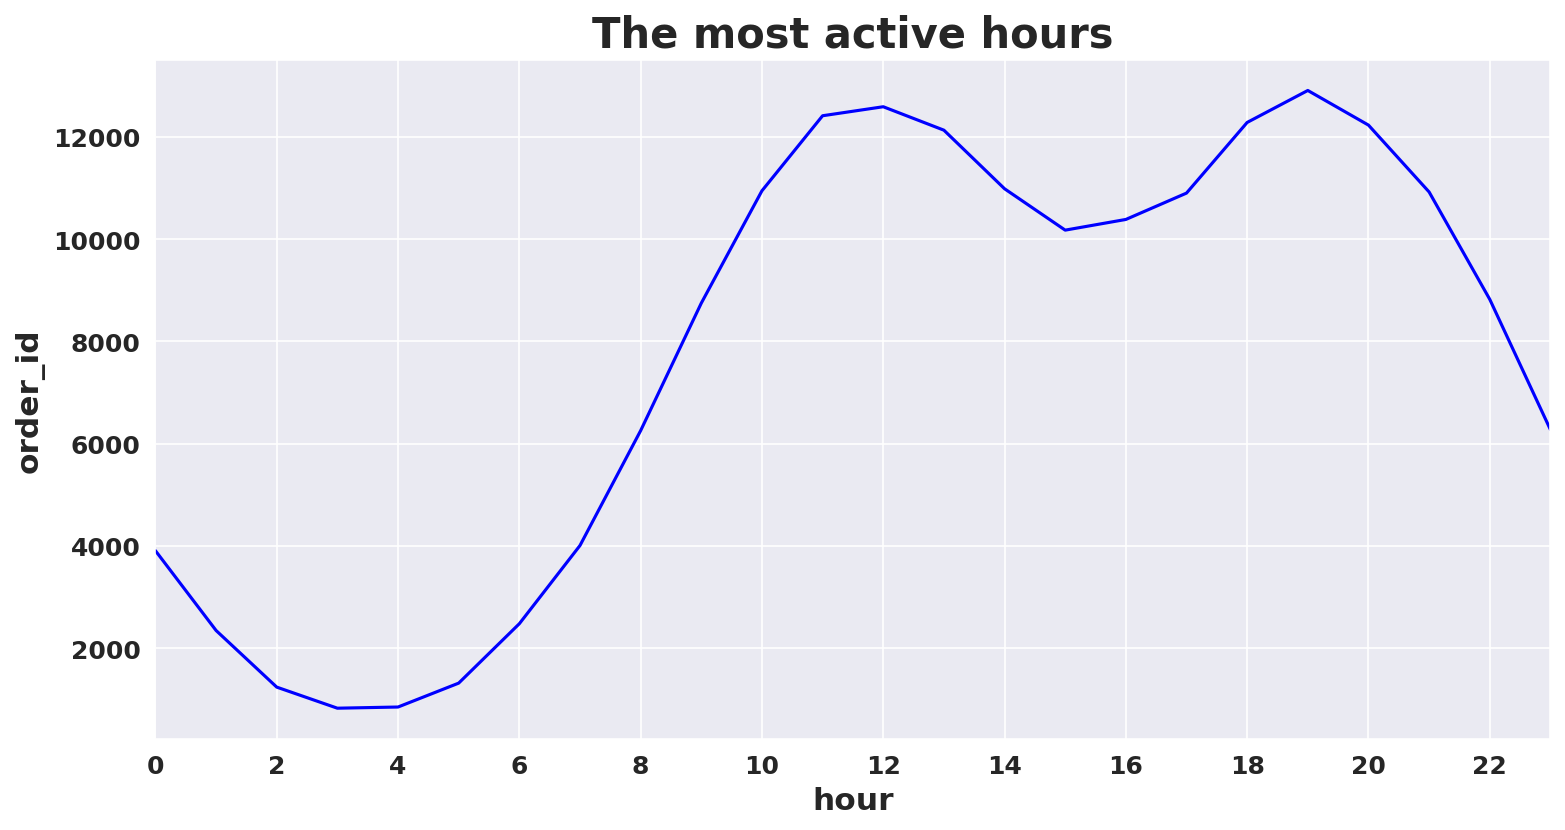

In [ ]:

plt.figure(figsize = (12,6))

plt.title('The most active hours',weight = 'heavy',size = 20)

plt.yticks(size = 12,weight = 'bold')
plt.xticks(np.arange(data['hour'].min(),data['hour'].max(),2),size = 12,weight = 'bold')

plt.xlim(data['hour'].min(),data['hour'].max())

plt.ylabel('',size = 15, weight = 'heavy')
plt.xlabel('',size = 15, weight = 'heavy')


sns.lineplot(data = data, x = 'hour', y = 'order_id',color = 'blue')

#### Question №4: What products are most often sold TOGETHER?

In [ ]:
sub.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,total_sales,month,city,hour
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",11.99,1,New York City,3
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",11.95,1,San Francisco,3
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",150.00,1,New York City,4
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2.99,1,Dallas,5
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",23.90,1,Atlanta,6


In [ ]:
dd = sub[sub['order_id'].duplicated(keep = False)].copy()

dd['grouped'] = dd.groupby(by = 'order_id', as_index = False)['product'].transform(lambda x: ','.join(x))

<ipython-input-30-617247b94283>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['grouped'] = dd.groupby(by = 'order_id', as_index = False)['product'].transform(lambda x: ','.join(x))


In [ ]:
dd = dd[['order_id','grouped']].drop_duplicates()


In [ ]:
dd.head()

,order_id,grouped
3763,144804,"iPhone,Wired Headphones"
7189,148074,"Google Phone,USB-C Charging Cable"
7576,148450,"iPhone,Lightning Charging Cable"
3630,144679,"USB-C Charging Cable,Google Phone"
6537,147451,"Google Phone,Wired Headphones"


In [ ]:
data = dd.groupby(by = 'grouped', as_index = False)['order_id'].count().sort_values(by = 'order_id',ascending = False)[:15]

[Text(0.5, 0, 'count')]

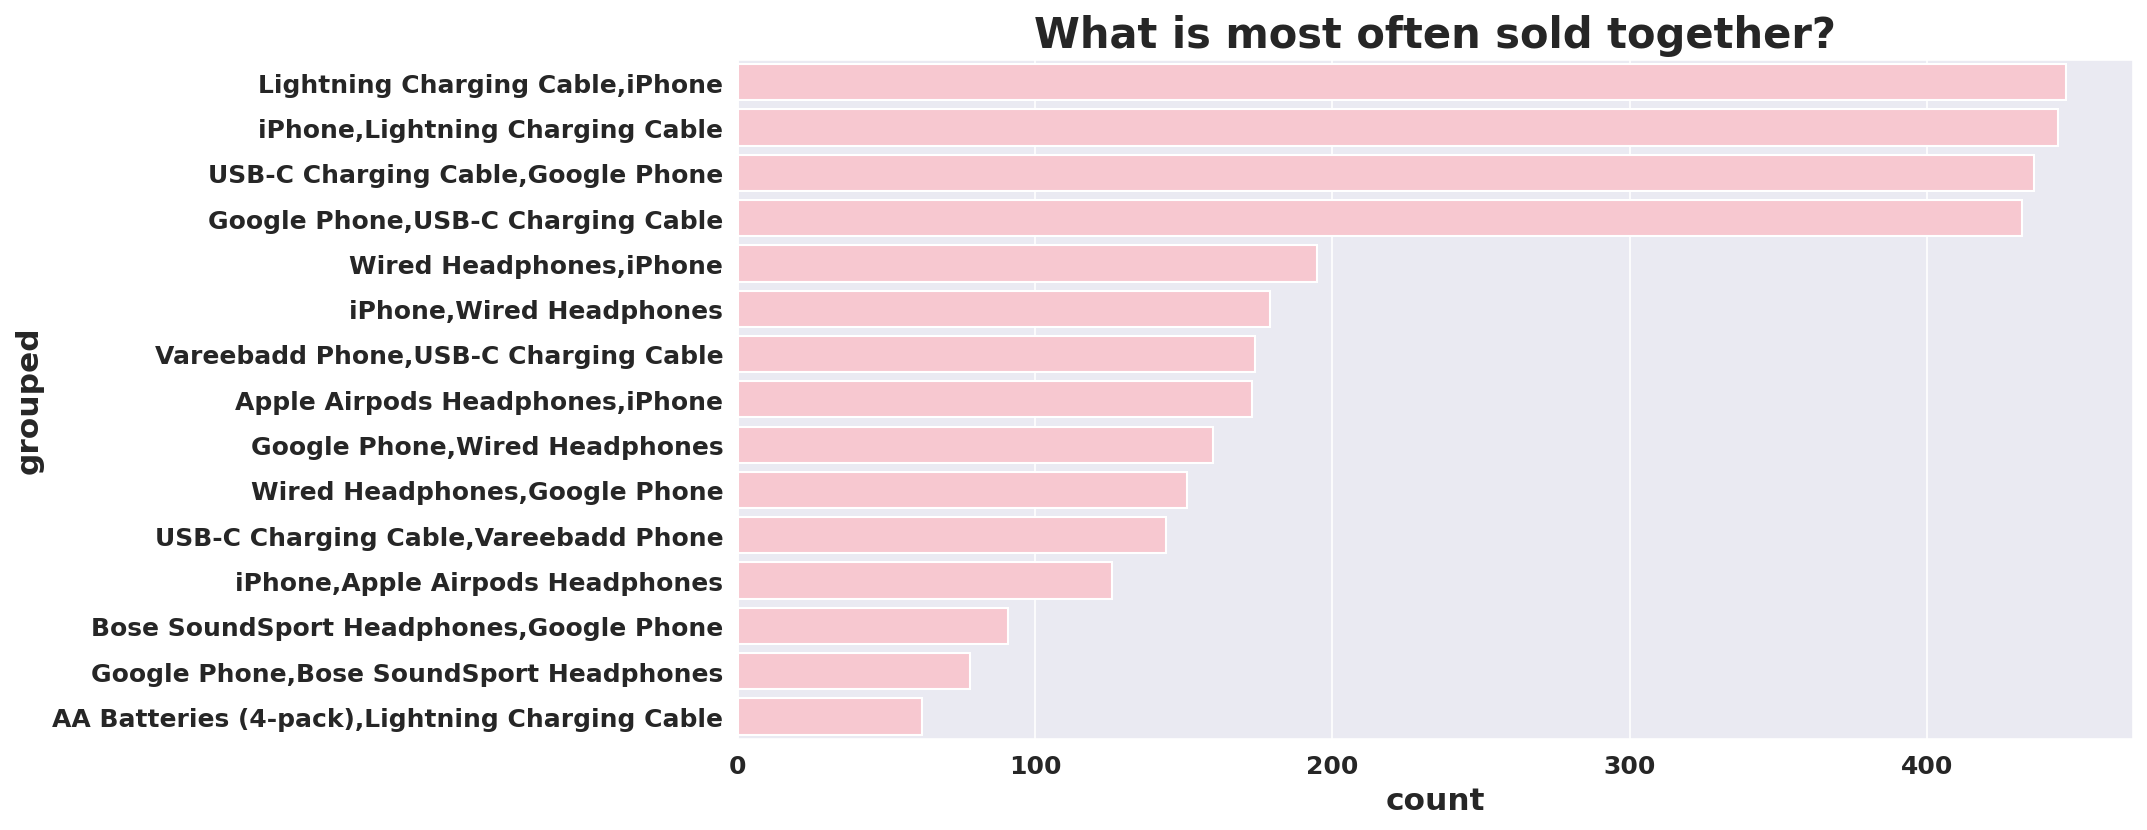

In [ ]:
plt.figure(figsize = (12,6))

plt.title('What is most often sold together?',weight = 'heavy',size = 20)

plt.yticks(size = 12,weight = 'bold')
plt.xticks(size = 12,weight = 'bold')

plt.ylabel('',size = 15, weight = 'heavy')
plt.xlabel('',size = 15, weight = 'heavy')


sns.barplot(data = data, y = data['grouped'],x = data['order_id'],color = 'pink').set(xlabel = 'count')

####Question №5: How many products are usually bought?

In [ ]:
data = sub['quantity_ordered'].value_counts() / sub['quantity_ordered'].count() * 100
data = pd.DataFrame(data)
data = data.reset_index()
data = data.rename(columns = {'index':'quantity',
                              'quantity_ordered': 'pcnt'})

In [ ]:
data

,quantity,pcnt
0,1,90.643721
1,2,7.165367
2,3,1.570315
3,4,0.433450
4,5,0.126916
5,6,0.043022
6,7,0.012907
7,8,0.002689
8,9,0.001613


#### Question №6: What is the average purchase by city?

In [ ]:
sub.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,total_sales,month,city,hour
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",11.99,1,New York City,3
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",11.95,1,San Francisco,3
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",150.00,1,New York City,4
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2.99,1,Dallas,5
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",23.90,1,Atlanta,6


In [ ]:
sub.groupby(by = 'city', as_index = False)['total_sales'].mean().sort_values(by = 'total_sales', ascending = False)

,city,total_sales
0,Atlanta,187.856903
5,New York City,187.502711
3,Dallas,186.772969
8,Seattle,186.516120
6,Portland,186.160498
7,San Francisco,184.704550
4,Los Angeles,184.177362
1,Austin,183.703357
2,Boston,183.688272


As we might see the average purchase is pretty same in all cities in dataset

#### Question №7: What was the largest purchase?

In [ ]:
sub.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,total_sales,month,city,hour
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",11.99,1,New York City,3
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",11.95,1,San Francisco,3
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",150.00,1,New York City,4
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2.99,1,Dallas,5
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",23.90,1,Atlanta,6


In [ ]:
sub[sub['total_sales'] == sub['total_sales'].max()]

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,total_sales,month,city,hour
5219,181544,Macbook Pro Laptop,2,1700.0,2019-04-22 12:48:00,"731 11th St, New York City, NY 10001",3400.0,4,New York City,12
4717,181069,Macbook Pro Laptop,2,1700.0,2019-04-27 21:01:00,"668 Park St, San Francisco, CA 94016",3400.0,4,San Francisco,21
6776,200528,Macbook Pro Laptop,2,1700.0,2019-05-13 13:40:00,"643 4th St, Boston, MA 02215",3400.0,5,Boston,13
385,210292,Macbook Pro Laptop,2,1700.0,2019-06-08 09:00:00,"953 Ridge St, San Francisco, CA 94016",3400.0,6,San Francisco,9


In [ ]:
sub[sub['total_sales'] == sub['total_sales'].min()]

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,total_sales,month,city,hour
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2.99,1,Dallas,5
1279,142451,AAA Batteries (4-pack),1,2.99,2019-01-01 06:41:00,"232 12th St, Boston, MA 02215",2.99,1,Boston,6
1633,142789,AAA Batteries (4-pack),1,2.99,2019-01-01 07:35:00,"336 Spruce St, Boston, MA 02215",2.99,1,Boston,7
5008,145990,AAA Batteries (4-pack),1,2.99,2019-01-01 09:03:00,"325 Madison St, Dallas, TX 75001",2.99,1,Dallas,9
9612,150394,AAA Batteries (4-pack),1,2.99,2019-01-01 09:08:00,"714 6th St, Boston, MA 02215",2.99,1,Boston,9
...,...,...,...,...,...,...,...,...,...,...
12906,307983,AAA Batteries (4-pack),1,2.99,2019-12-31 22:27:00,"89 Elm St, Seattle, WA 98101",2.99,12,Seattle,22
3713,299197,AAA Batteries (4-pack),1,2.99,2019-12-31 22:29:00,"205 Hickory St, Los Angeles, CA 90001",2.99,12,Los Angeles,22
12480,307576,AAA Batteries (4-pack),1,2.99,2019-12-31 22:38:00,"586 Walnut St, Los Angeles, CA 90001",2.99,12,Los Angeles,22
14778,309773,AAA Batteries (4-pack),1,2.99,2019-12-31 23:52:00,"60 Hickory St, Los Angeles, CA 90001",2.99,12,Los Angeles,23


#### SQL 

In [ ]:
!pip install -U pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=a46a639dcc97a2596d1827ef849dad667c4da6e6f146c67e1f2f980b0ed7c3c8
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [ ]:
from pandasql import sqldf

In [ ]:
q = '''SELECT city, AVG(total_sales) as average_sales
       FROM sub
       GROUP BY city
       ORDER BY average_sales DESC
       '''

In [ ]:
sqldf(q)

,city,average_sales
0,Atlanta,187.856903
1,New York City,187.502711
2,Dallas,186.772969
3,Seattle,186.516120
4,Portland,186.160498
5,San Francisco,184.704550
6,Los Angeles,184.177362
7,Austin,183.703357
8,Boston,183.688272


In [ ]:
sub.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,total_sales,month,city,hour
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",11.99,1,New York City,3
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",11.95,1,San Francisco,3
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",150.00,1,New York City,4
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2.99,1,Dallas,5
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",23.90,1,Atlanta,6


In [ ]:
q = '''SELECT strftime('%Y', order_date) as year
       FROM sub'''

In [ ]:
sqldf(q)

,year
0,2019
1,2019
2,2019
3,2019
4,2019
...,...
185945,2019
185946,2019
185947,2019
185948,2019


In [ ]:
sub.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,total_sales,month,city,hour
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",11.99,1,New York City,3
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",11.95,1,San Francisco,3
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",150.00,1,New York City,4
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2.99,1,Dallas,5
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",23.90,1,Atlanta,6


In [ ]:
q = '''SELECT DISTINCT city,month, 
       AVG(total_sales) OVER (PARTITION BY month) as monthly_sales
       FROM sub
       ORDER BY city
       
       
       '''
sqldf(q)

,city,month,monthly_sales
0,Atlanta,1,187.687376
1,Atlanta,2,183.884962
2,Atlanta,3,185.250471
3,Atlanta,4,185.495390
4,Atlanta,5,190.305852
...,...,...,...
103,Seattle,8,187.648849
104,Seattle,9,180.497387
105,Seattle,10,184.238580
106,Seattle,11,182.074956


In [ ]:
sub.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,total_sales,month,city,hour
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",11.99,1,New York City,3
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",11.95,1,San Francisco,3
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",150.00,1,New York City,4
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2.99,1,Dallas,5
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",23.90,1,Atlanta,6


In [ ]:
q = '''SELECT city,AVG(price_each) AS avg_price
       FROM sub
       WHERE product = 'Wired Headphones'
       GROUP BY city
       
       '''
sqldf(q)

,city,avg_price
0,Atlanta,11.99
1,Austin,11.99
2,Boston,11.99
3,Dallas,11.99
4,Los Angeles,11.99
5,New York City,11.99
6,Portland,11.99
7,San Francisco,11.99
8,Seattle,11.99


In [ ]:
q = '''SELECT city,product,SUM(quantity_ordered) AS quanity_sold
       FROM sub
       WHERE product IN ('Wired Headphones','AAA Batteries (4-pack)','Apple Airpods Headphones')
       GROUP BY city,product
       ORDER BY product,quanity_sold DESC
       
       '''
sqldf(q)

,city,product,quanity_sold
0,San Francisco,AAA Batteries (4-pack),7408
1,Los Angeles,AAA Batteries (4-pack),4967
2,New York City,AAA Batteries (4-pack),4124
3,Boston,AAA Batteries (4-pack),3461
4,Dallas,AAA Batteries (4-pack),2504
5,Seattle,AAA Batteries (4-pack),2446
6,Atlanta,AAA Batteries (4-pack),2359
7,Portland,AAA Batteries (4-pack),2080
8,Austin,AAA Batteries (4-pack),1668
9,San Francisco,Apple Airpods Headphones,3733
